In [4]:
!pip install tensorflow

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('patient_readmission.csv', 
                 parse_dates = ['date'])
df.head()

,date,num_patients_admitted,avg_length_of_stay,avg_lab_result_score,hospital_resource_utilization,readmission_rate
0,2020-01-01,96,6.429705,72.699496,0.310710,0.111707
1,2020-01-02,107,5.430686,88.122348,0.455792,0.113145
2,2020-01-03,88,4.081344,56.300101,0.339738,0.050000
3,2020-01-04,103,5.542255,59.820961,0.474732,0.056116
4,2020-01-05,111,3.284411,97.572241,0.441357,0.154602


In [7]:
df.dtypes

date                             datetime64[ns]
num_patients_admitted                     int64
avg_length_of_stay                      float64
avg_lab_result_score                    float64
hospital_resource_utilization           float64
readmission_rate                        float64
dtype: object

In [8]:
df = df.set_index('date')
df.head()

,num_patients_admitted,avg_length_of_stay,avg_lab_result_score,hospital_resource_utilization,readmission_rate
date,,,,,
2020-01-01,96,6.429705,72.699496,0.310710,0.111707
2020-01-02,107,5.430686,88.122348,0.455792,0.113145
2020-01-03,88,4.081344,56.300101,0.339738,0.050000
2020-01-04,103,5.542255,59.820961,0.474732,0.056116
2020-01-05,111,3.284411,97.572241,0.441357,0.154602


In [9]:
df.columns

Index(['num_patients_admitted', 'avg_length_of_stay', 'avg_lab_result_score',
       'hospital_resource_utilization', 'readmission_rate'],
      dtype='object')

In [10]:
#features & target
features = ['num_patients_admitted', 'avg_length_of_stay', 'avg_lab_result_score',
            'hospital_resource_utilization']
target = ['readmission_rate']

In [11]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [12]:
X_scaled = scaler_x.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[target])

In [13]:
print(len(X_scaled))

1000


In [14]:
#Create sequence
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs) , np.array(ys)

In [15]:
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps=30)

In [16]:
X_seq.shape

(970, 30, 4)

In [17]:
X_seq

array([[[0.44615385, 0.51139076, 0.45417402, 0.18950514],
        [0.61538462, 0.36243074, 0.76277705, 0.43784688],
        [0.32307692, 0.16123524, 0.12603092, 0.23919376],
        ...,
        [0.63076923, 0.35643614, 0.79807905, 0.47628781],
        [0.6       , 0.26817326, 0.36753386, 0.37563875],
        [0.63076923, 0.47955767, 0.08702766, 0.38393673]],

       [[0.61538462, 0.36243074, 0.76277705, 0.43784688],
        [0.32307692, 0.16123524, 0.12603092, 0.23919376],
        [0.55384615, 0.37906639, 0.19648144, 0.47026721],
        ...,
        [0.6       , 0.26817326, 0.36753386, 0.37563875],
        [0.63076923, 0.47955767, 0.08702766, 0.38393673],
        [0.44615385, 0.47568399, 0.55701767, 0.29601445]],

       [[0.32307692, 0.16123524, 0.12603092, 0.23919376],
        [0.55384615, 0.37906639, 0.19648144, 0.47026721],
        [0.67692308, 0.04240744, 0.95186435, 0.41313771],
        ...,
        [0.63076923, 0.47955767, 0.08702766, 0.38393673],
        [0.44615385, 0.475683

In [18]:
y_seq.shape

(970, 1)

In [19]:
y_seq

array([[3.37317390e-01],
       [6.10160190e-01],
       [5.87346611e-01],
       [0.00000000e+00],
       [5.41751118e-01],
       [1.52115638e-01],
       [3.01718808e-05],
       [7.29232845e-01],
       [7.46958232e-02],
       [2.29751100e-01],
       [0.00000000e+00],
       [6.81005089e-01],
       [7.08634312e-01],
       [4.77490174e-01],
       [6.55013824e-01],
       [0.00000000e+00],
       [1.87492909e-01],
       [1.12963331e-01],
       [2.32727219e-02],
       [3.90158783e-01],
       [6.50298271e-01],
       [0.00000000e+00],
       [6.64696168e-02],
       [5.73169052e-02],
       [7.45695095e-02],
       [6.54940926e-01],
       [3.10071340e-01],
       [2.28823153e-01],
       [6.76825284e-01],
       [0.00000000e+00],
       [3.45346633e-01],
       [3.31928032e-01],
       [4.83791009e-01],
       [8.32066844e-01],
       [5.75059517e-01],
       [2.73005909e-01],
       [7.87874288e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.55212567e-02],


In [20]:
split = int(0.8 * len(X_seq))
x_train, x_test = X_seq[:split] , X_seq[split:]
y_train, y_test = y_seq[:split] , y_seq[split:]

In [21]:
x_train.shape

(776, 30, 4)

In [22]:
y_train.shape

(776, 1)

In [23]:
#Define molder builder
def build_model(model_type = 'RNN' , units=50):
    model = tensorflow.keras.models.Sequential()
    if model_type == 'RNN':
        model.add(tensorflow.keras.layers.SimpleRNN(units , input_shape=(x_train.shape[1], x_train.shape[2])))
    elif model_type == 'LSTM':
        model.add(tensorflow.keras.layers.LSTM(units , input_shape=(x_train.shape[1], x_train.shape[2])))
    elif model_type == 'GRU':
        model.add(tensorflow.keras.layers.GRU(units , input_shape=(x_train.shape[1], x_train.shape[2])))

    
    model.add(tensorflow.keras.layers.Dense(1))
    model.compile(optimizer='adam' , loss = 'mse')
    return model

In [24]:
results = {}

for model_type in ['RNN' , 'LSTM' , 'GRU']:
    print(f"Training model type - {model_type}")
    model = build_model(model_type, units=10)
    history = model.fit(x_train, y_train, epochs=50, batch_size=20, validation_data=(x_test, y_test))

    #Predictions
    y_pred_scaled = model.predict(x_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    #evaluation
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results[model_type] = {
        'model' : model,
        'mse' : mse,
        'r2' : r2,
        'y_pred' : y_pred,
        'y_true' : y_true
    }

    print(f"{model_type} MSE: {mse} , R2 : {r2}")

Training model type - RNN
Epoch 1/50


C:\Users\hs_su\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1388 - val_loss: 0.0988
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0876 - val_loss: 0.0907
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0848 - val_loss: 0.0861
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0758 - val_loss: 0.0835
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0790 - val_loss: 0.0817
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - val_loss: 0.0818
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0758 - val_loss: 0.0802
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0769 - val_loss: 0.0792
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0773 - val_loss: 0.0787
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0850 - val_loss: 0.0781
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0760 - val_loss: 0.0777
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0731 - val_loss: 0.

C:\Users\hs_su\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1925 - val_loss: 0.0768
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0724 - val_loss: 0.0760
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0728 - val_loss: 0.0760
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0749 - val_loss: 0.0763
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0759 - val_loss: 0.0759
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0781 - val_loss: 0.0758
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0730 - val_loss: 0.0763
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0720 - val_loss: 0.0756
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0739 - val_loss: 0.0755
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0768 - val_loss: 0.0758
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0772 - val_loss: 0.0755
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0689 - val_l

C:\Users\hs_su\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0987 - val_loss: 0.0882
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0844 - val_loss: 0.0849
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0818 - val_loss: 0.0823
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0853 - val_loss: 0.0805
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0812 - val_loss: 0.0793
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0809 - val_loss: 0.0820
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0786 - val_loss: 0.0776
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0770 - val_loss: 0.0776
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0797 - val_loss: 0.0770
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0725 - val_loss: 0.0766
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0742 - val_loss: 0.0762
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0757 - val_l

In [33]:
# Save LSTM model
from tensorflow.keras.models import save_model

lstm_model = results['LSTM']['model']
save_model(lstm_model, 'lstm_model.h5')

In [34]:
import joblib

# Save scalers
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

RNN
LSTM
GRU


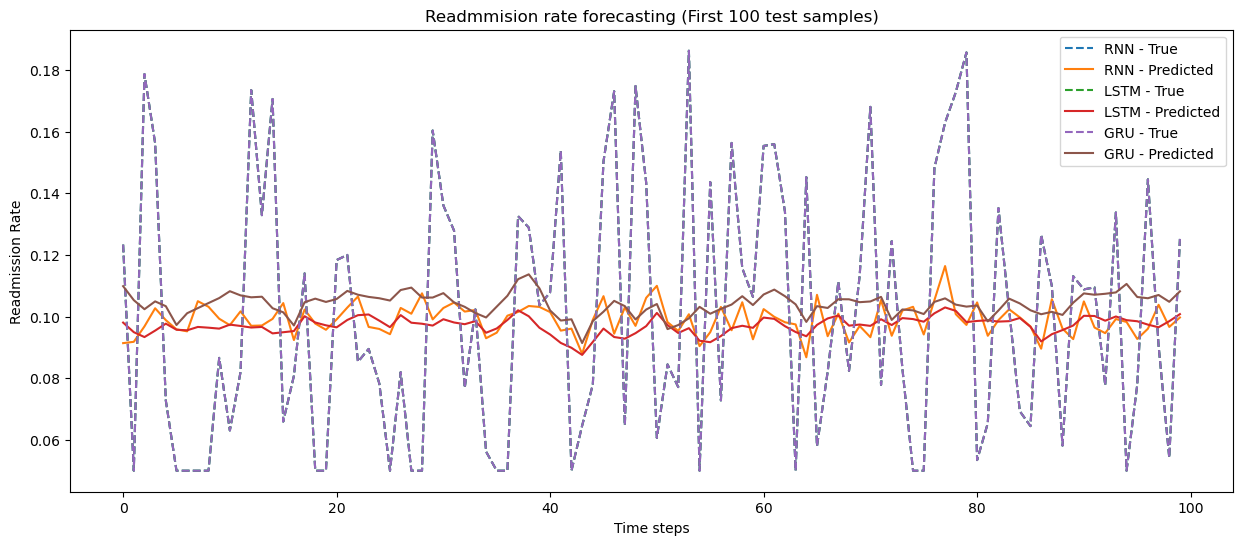

In [25]:
#Plotting predictions
plt.figure(figsize = (15,6))

for model_type,res in results.items():
    print(model_type)
    plt.plot(res['y_true'][:100], label = f"{model_type} - True", linestyle = '--')
    plt.plot(res['y_pred'][:100], label = f"{model_type} - Predicted")

plt.title("Readmmision rate forecasting (First 100 test samples)")
plt.xlabel("Time steps")
plt.ylabel('Readmission Rate')
plt.legend()
plt.show()

In [26]:
#A relaistic exaple to predict readdmision for today
new_day = {
    'num_patients_admitted' : 120,
    'avg_length_of_stay' : 4.8,
    'avg_lab_result_score' : 58.3,
    'hospital_resource_utilization' : 0.78
}

new_day_df = pd.DataFrame([new_day])
new_day_df

,num_patients_admitted,avg_length_of_stay,avg_lab_result_score,hospital_resource_utilization
0,120,4.8,58.3,0.78


In [35]:
last_30_days = df[features].tail(30).copy()

last_30_days.to_csv('last_30_days.csv')

#add the new day information into the sequence
combined = pd.concat([last_30_days, new_day_df])
combined

,num_patients_admitted,avg_length_of_stay,avg_lab_result_score,hospital_resource_utilization
2022-08-28 00:00:00,87,5.524700,83.151360,0.321076
2022-08-29 00:00:00,99,3.493918,83.953330,0.435946
2022-08-30 00:00:00,103,4.856804,96.587020,0.407017
2022-08-31 00:00:00,91,3.000000,99.847471,0.256008
2022-09-01 00:00:00,91,4.879100,86.007873,0.279321
2022-09-02 00:00:00,85,3.750416,64.361060,0.259812
2022-09-03 00:00:00,110,6.373085,93.987620,0.527289
2022-09-04 00:00:00,100,4.175690,52.461046,0.291421
2022-09-05 00:00:00,119,4.824851,61.554043,0.589594
2022-09-06 00:00:00,83,4.046663,94.869286,0.237904


In [28]:
combined.shape

(31, 4)

In [31]:
#Scale the input
combined_scaled = scaler_x.transform(combined)

X_new = combined_scaled[-30:].reshape(1,30,4)

model = results['LSTM']['model']

#predict & inverse transform
y_pred_scaled = model.predict(X_new)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print(f"Predicted readdmission rate for new day : {y_pred[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted readdmission rate for new day : 0.0894
